# Spring 2025 - Final Project

In this project, the goal is to build a machine learning model that predicts whether an employee is likely to leave the company. However, unlike traditional supervised learning scenarios, we are not directly provided with the labels (i.e., whether an employee left or stayed).

Instead, we are allowed to query a Subject Matter Expert (SME) named John, who has internal knowledge of employee outcomes. John can answer a limited number of label queries (maximum 500) using the sme.ask() method. This setup closely mimics real-world cases where labeling is expensive or partially available.





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [ ]:
class SME():

    def __init__(self):
        self.asked = 0
        self.df = self.get()

    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')

        X_train['Left'] = y_train
        return X_train

    def ask(self, valuedict):
        self.asked += 1
        #  print(self.asked)

        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        arr = []
        for prop in valuedict:
            val = valuedict[prop]

            if val is None:
                continue

            val = f"'{val}'" if isinstance(val,str) else val
            # print(prop, val)
            arr.append(f'{prop} == {val}')

            query = ' and '.join(arr)
        result = self.df.query(query)

        if len(result) == 0:
            raise Exception("I don't know")

        return (int)(result['Left'].mean())


In [ ]:
sme = SME()

In [ ]:
sme.ask({
    'RecordId': 100,
})

0

Exploratory Data Analysis

In [ ]:
sme.df.head()

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,Left
0,100,1,>30miles,7,91,4,14,3,8,1,...,3,2,9,5,5,72K,73K,4.0,4.0,0
1,101,0,~10miles,10,52,5,9,2,10,0,...,3,4,8,1,1,62K,64K,4.0,4.0,0
2,102,0,~10miles,10,80,3,13,3,16,0,...,7,2,7,8,5,73K,74K,4.0,2.0,1
3,103,0,~15miles,5,6,3,15,5,16,0,...,6,9,5,5,1,63K,64K,5.0,5.0,0
4,104,1,~10miles,10,3,2,13,3,18,0,...,3,4,4,4,2,60K,64K,4.0,4.0,0


In [ ]:
sme.df.shape

(500000, 28)

In [ ]:
sme.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 500000 non-null  int64  
 1   Gender                   500000 non-null  int64  
 2   Distance                 499492 non-null  object 
 3   YearsWorked              500000 non-null  int64  
 4   TrainingHours            500000 non-null  int64  
 5   WorkLifeBalance          500000 non-null  int64  
 6   NumOfProjects            500000 non-null  int64  
 7   JobInvolvement           500000 non-null  int64  
 8   TeamSize                 500000 non-null  int64  
 9   MentorshipReceived       500000 non-null  int64  
 10  TechSkillLevel           500000 non-null  int64  
 11  AttendanceRate           500000 non-null  float64
 12  StressLevel              500000 non-null  int64  
 13  PeerFeedbackScore        500000 non-null  int64  
 14  Annu

Data Cleaning

There are a few missing values and we plan to remove it as we have a huge dataset.

In [ ]:
sme.df.dropna(inplace=True)

In [ ]:
sme.df.shape

(497458, 28)

In [ ]:
sme.df.describe()

,RecordId,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,...,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,SelfReview,SupervisorReview,Left
count,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,...,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000
mean,250092.280271,0.401222,7.002434,49.484276,3.002846,10.007076,2.996989,9.998645,0.500698,2.999126,...,0.499922,3.001584,4.997208,4.996271,4.996567,5.003186,3.999606,4.399889,4.096969,0.360822
std,144342.931245,0.490146,1.867904,28.866431,1.413969,5.479057,1.414584,5.479619,0.500000,1.414112,...,0.500000,1.413566,2.583301,2.582112,2.579297,2.580980,2.161969,0.663479,0.945609,0.480240
min,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000
25%,125104.250000,0.000000,6.000000,24.000000,2.000000,5.000000,2.000000,5.000000,0.000000,2.000000,...,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,0.000000
50%,250100.500000,0.000000,7.000000,50.000000,3.000000,10.000000,3.000000,10.000000,1.000000,3.000000,...,0.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,0.000000
75%,375102.750000,1.000000,8.000000,74.000000,4.000000,15.000000,4.000000,15.000000,1.000000,4.000000,...,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,5.000000,1.000000
max,500099.000000,1.000000,14.000000,99.000000,5.000000,19.000000,5.000000,19.000000,1.000000,5.000000,...,1.000000,5.000000,9.000000,9.000000,9.000000,9.000000,7.000000,5.000000,5.000000,1.000000


Preprocesing:

Distance is extracted from text and converted to a numeric format.

Salary and PreviousSalary are converted from string (e.g., "72K") to proper integers in dollar amounts.

AttendanceRate, SelfReview, and SupervisorReview are rounded and cast to integer types for consistency.




Feature Engineering:

ReviewDiff: Measures the difference between supervisor and self-evaluations. A negative value may indicate misalignment, which could signal dissatisfaction.

SalaryDiff: Captures the net salary increase (or decrease). A smaller raise may correlate with an employee’s likelihood to leave.

These engineered features add behavioral and financial signals to the model, helping improve predictive performance.

In [ ]:
sme.df['Distance'] = sme.df['Distance'].str.extract(r'(\d+)').astype(float).astype('Int64')

for col in ['PreviousSalary', 'Salary']:
    sme.df[col] = sme.df[col].str.replace('K', '', regex=False).astype(float) * 1000
    sme.df[col] = sme.df[col].astype('Int64')

float_cols_to_int = ['AttendanceRate', 'SelfReview', 'SupervisorReview']
sme.df[float_cols_to_int] = sme.df[float_cols_to_int].round().astype('Int64')

In [ ]:
sme.df['ReviewDiff'] = sme.df['SupervisorReview'] - sme.df['SelfReview']
sme.df['SalaryDiff'] = sme.df['Salary'] - sme.df['PreviousSalary']

In [ ]:
sme.df

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,Left,ReviewDiff,SalaryDiff
0,100,1,30,7,91,4,14,3,8,1,...,9,5,5,72000,73000,4,4,0,0,1000
1,101,0,10,10,52,5,9,2,10,0,...,8,1,1,62000,64000,4,4,0,0,2000
2,102,0,10,10,80,3,13,3,16,0,...,7,8,5,73000,74000,4,2,1,-2,1000
3,103,0,15,5,6,3,15,5,16,0,...,5,5,1,63000,64000,5,5,0,0,1000
4,104,1,10,10,3,2,13,3,18,0,...,4,4,2,60000,64000,4,4,0,0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,500095,1,30,9,80,1,10,3,14,0,...,5,1,2,61000,63000,4,5,0,1,2000
499996,500096,0,20,7,0,3,2,5,4,1,...,6,5,2,60000,62000,5,5,0,0,2000
499997,500097,0,20,10,8,3,13,3,13,1,...,8,4,6,65000,68000,5,2,0,-3,3000
499998,500098,0,15,10,51,3,7,3,5,0,...,7,6,2,53000,54000,5,5,1,0,1000


In [ ]:
sme.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497458 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   RecordId                 497458 non-null  int64
 1   Gender                   497458 non-null  int64
 2   Distance                 497458 non-null  Int64
 3   YearsWorked              497458 non-null  int64
 4   TrainingHours            497458 non-null  int64
 5   WorkLifeBalance          497458 non-null  int64
 6   NumOfProjects            497458 non-null  int64
 7   JobInvolvement           497458 non-null  int64
 8   TeamSize                 497458 non-null  int64
 9   MentorshipReceived       497458 non-null  int64
 10  TechSkillLevel           497458 non-null  int64
 11  AttendanceRate           497458 non-null  Int64
 12  StressLevel              497458 non-null  int64
 13  PeerFeedbackScore        497458 non-null  int64
 14  AnnualLeaveDays          497458 non-null 

In [ ]:
df = sme.df.copy()

## Target Value Distribution:



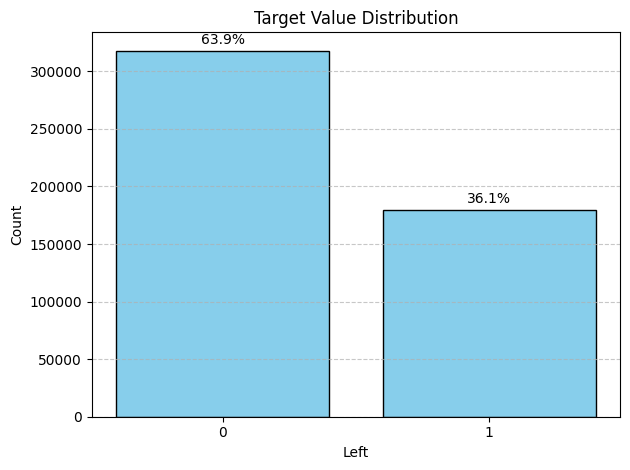

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df.Left.value_counts()
percentages = df.Left.value_counts(normalize=True) * 100

fig, ax = plt.subplots()
bars = ax.bar(counts.index.astype(str), counts, color='skyblue', edgecolor='black')

for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(counts)*0.01,
            f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

ax.set_title('Target Value Distribution')
ax.set_xlabel('Left')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This bar chart shows the distribution of the target variable Left, where 0 represents employees who stayed and 1 represents those who left. Approximately 63.9% of employees stayed, while 36.1% left, indicating a moderate class imbalance. This insight is important for choosing appropriate evaluation metrics so we plan to go with precision than accuracy.

## Correlation Heatmap of Employee Dataset:


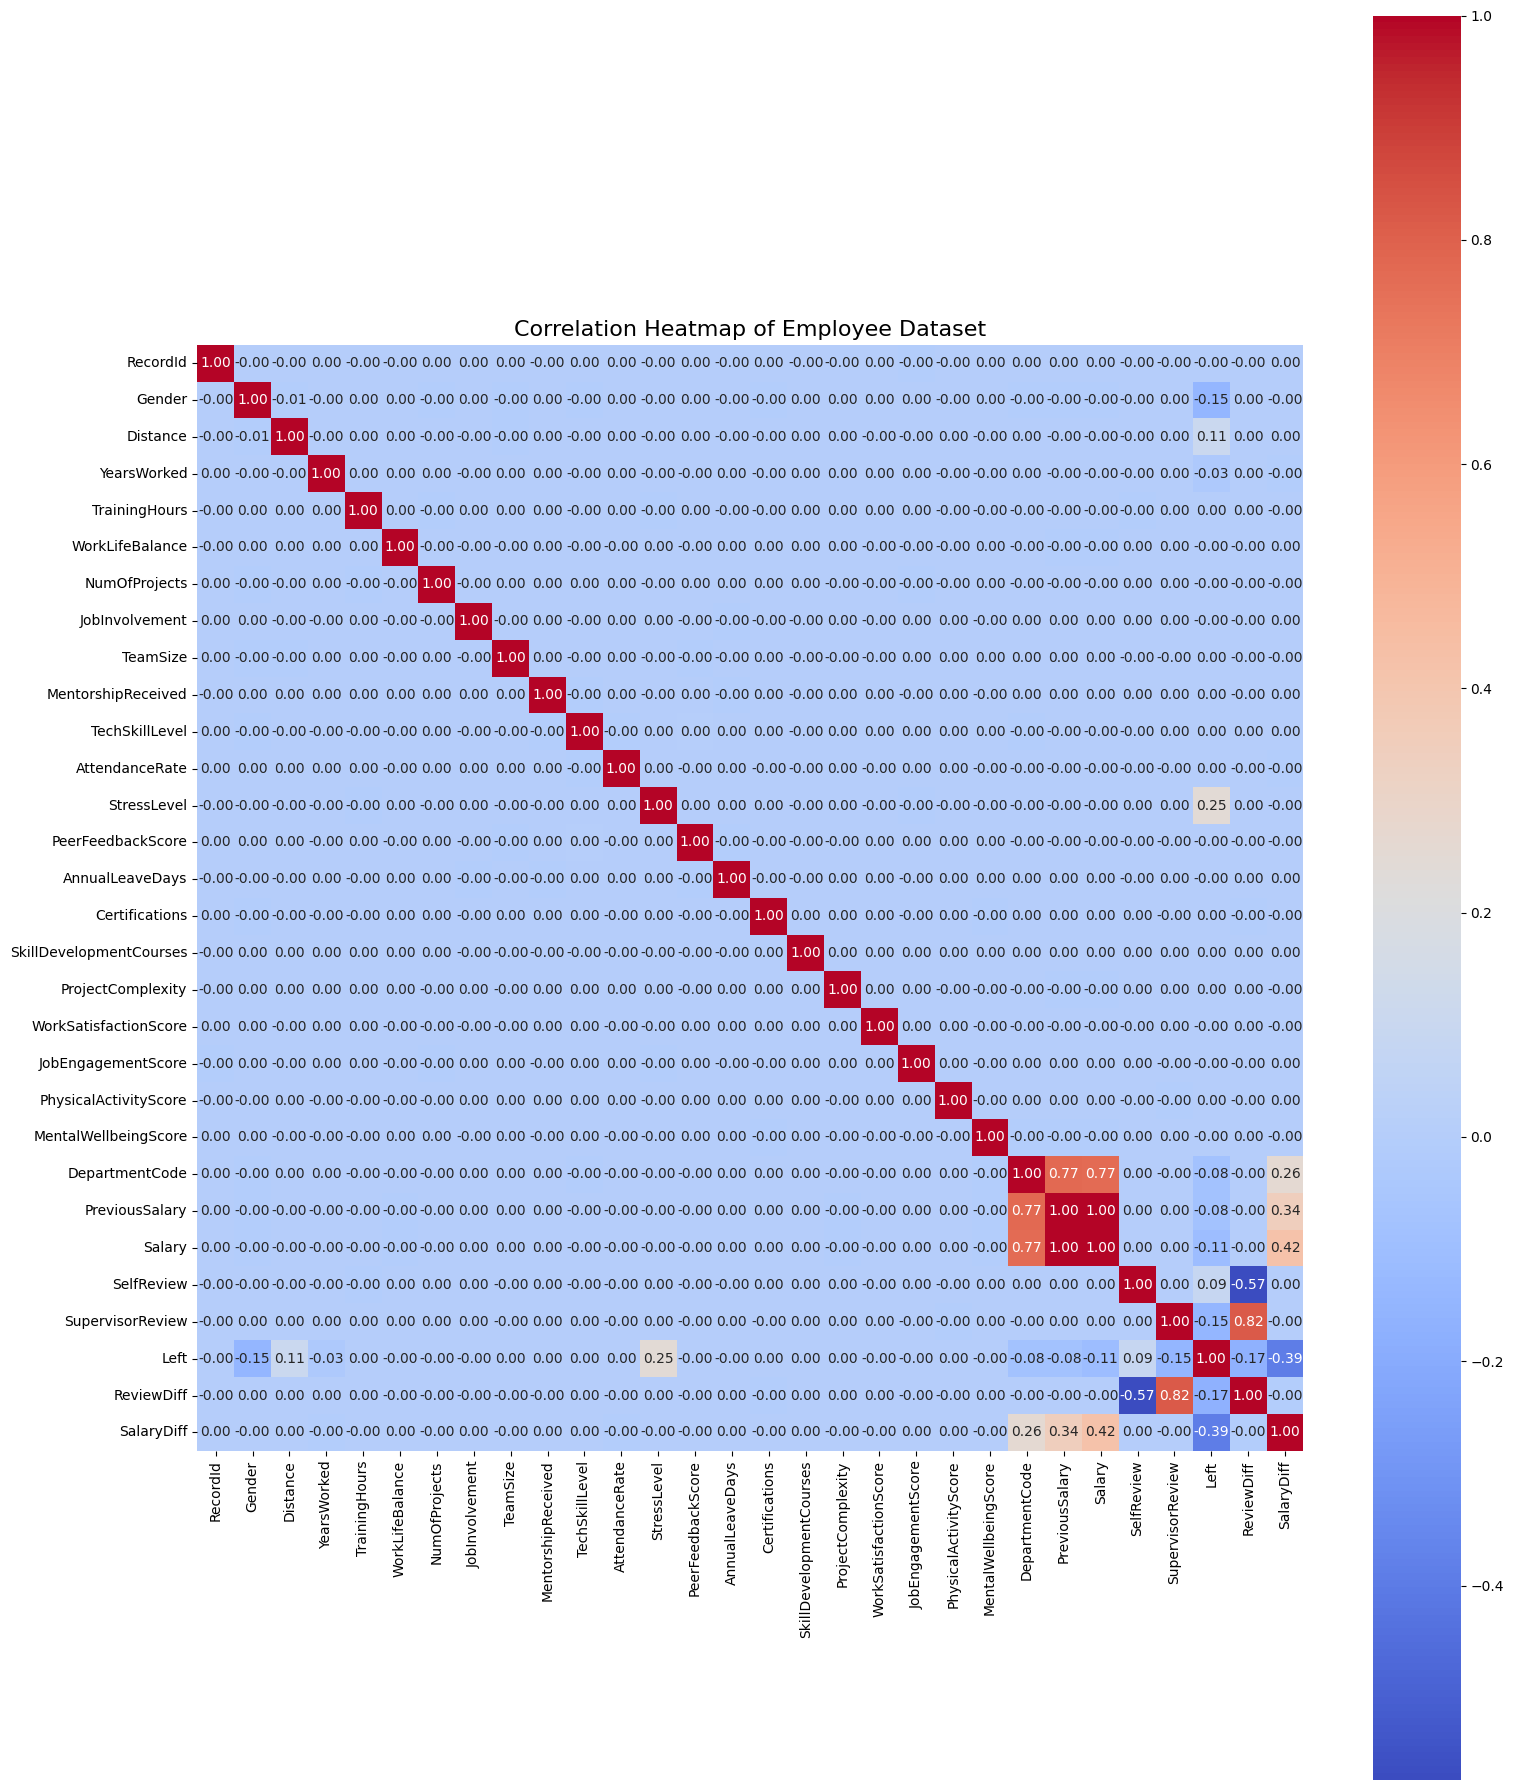

In [ ]:
plt.figure(figsize=(16, 18))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',  square=True)

plt.title("Correlation Heatmap of Employee Dataset", fontsize=16)
plt.tight_layout()
plt.show()


This heatmap visualizes the pairwise Pearson correlation coefficients between numerical features in the dataset. Darker red indicates a strong positive correlation, while darker blue indicates a strong negative correlation.
Key observations include:

ReviewDiff (difference between self and supervisor reviews) has a negative correlation with Left (-0.17), suggesting employees with mismatched reviews may be more likely to leave.

StressLevel and SalaryDiff show modest correlation with Left (0.25 and 0.18 respectively), indicating their potential predictive value.

Most features show low correlation with the Target Variable, so we plan to take features that have moderate or little correlation with the Target variable that is 'Left'


In [ ]:
corr = df.corr()
print(corr['Left'].sort_values(ascending=False))


Left                       1.000000
StressLevel                0.245442
Distance                   0.107748
SelfReview                 0.089785
MentorshipReceived         0.002083
ProjectComplexity          0.001950
AttendanceRate             0.001667
Certifications             0.000929
TeamSize                   0.000795
TrainingHours              0.000696
TechSkillLevel             0.000648
SkillDevelopmentCourses    0.000160
PhysicalActivityScore      0.000033
JobInvolvement            -0.000064
NumOfProjects             -0.000085
PeerFeedbackScore         -0.000319
MentalWellbeingScore      -0.000454
AnnualLeaveDays           -0.000497
WorkSatisfactionScore     -0.000617
RecordId                  -0.000621
WorkLifeBalance           -0.001074
JobEngagementScore        -0.001366
YearsWorked               -0.031382
DepartmentCode            -0.076073
PreviousSalary            -0.079901
Salary                    -0.110514
SupervisorReview          -0.146785
Gender                    -0

Group-wise Mean and Mode Comparison: Stayed vs. Left Employees

To understand the typical characteristics of employees who stayed or left the company, we analyzed the data by calculating the mean and mode of relevant features to identify any recurring patterns and difference between the features of the one's who left and those who stayed .

In [ ]:
grouped_means = df.groupby('Left').mean(numeric_only=True)

long_format = grouped_means.reset_index().melt(id_vars='Left',
                                                var_name='Feature',
                                                value_name='MeanValue')
pivot_table = long_format.pivot(index='Feature', columns='Left', values='MeanValue')
pivot_table.columns = ['Stayed (0)', 'Left (1)']
pivot_table.head(27)


,Stayed (0),Left (1)
Feature,,
AnnualLeaveDays,14.510728,14.501777
AttendanceRate,89.98808,90.00819
Certifications,2.00066,2.003398
DepartmentCode,4.123177,3.780706
Distance,14.441682,15.942232
Gender,0.455303,0.30542
JobEngagementScore,4.998921,4.991576
JobInvolvement,2.997056,2.996869
MentalWellbeingScore,5.004066,5.001627


In [ ]:
mode_df = df.groupby('Left').agg(lambda x: x.mode(dropna=True).iloc[0] if not x.mode().empty else None)

mode_long = mode_df.reset_index().melt(id_vars='Left',
                                       var_name='Feature',
                                       value_name='ModeValue')
mode_pivot = mode_long.pivot(index='Feature', columns='Left', values='ModeValue')

mode_pivot.columns = ['Stayed (0)', 'Left (1)']


In [ ]:
mode_pivot.head(27)

,Stayed (0),Left (1)
Feature,,
AnnualLeaveDays,28,18
AttendanceRate,81,90
Certifications,1,4
DepartmentCode,7,5
Distance,10,15
Gender,0,0
JobEngagementScore,5,3
JobInvolvement,1,2
MentalWellbeingScore,2,4


In [ ]:
df[['DepartmentCode', 'Left']].value_counts().unstack()

Left,0,1
DepartmentCode,,
1,50435,32794
2,50156,32836
3,52760,29602
5,46796,36125
6,56704,26242
7,61113,21895


## Employee Stay vs. Leave Counts by Years Worked

In [ ]:
years_vs_left = df[['YearsWorked', 'Left']].value_counts().unstack(fill_value=0)
years_vs_left.columns = ['Stayed', 'Left']
years_vs_left = years_vs_left.sort_index().reset_index()

df_melted = years_vs_left.melt(id_vars='YearsWorked', value_vars=['Stayed', 'Left'],
                               var_name='Status', value_name='Count')

fig = px.line(df_melted, x='YearsWorked', y='Count', color='Status', markers=True,  color_discrete_map={'Stayed': 'green', 'Left': 'blue'},
              title='Employee Stay/Leave Counts by Years Worked')

fig.show()


The above chart displays the number of employees who stayed (green) and those who left (blue) the company, based on their total years worked.

Most attrition occurs around 6 to 8 years, where the number of employees leaving peaks.

After around 10 years, both stay and leave counts decline, indicating fewer long-tenured employees overall.

Employees with fewer than 3 years of service are also less likely to leave, suggesting attrition risk is highest mid-tenure.

This visualization helps understand when employees are most likely to leave, which can be useful for targeted retention strategies.

In [ ]:
df[['Gender','Left']].value_counts()

,,count
Gender,Left,
0,0,173194
1,0,144770
0,1,124673
1,1,54821


## Gender Distribution in the Employee Dataset

In [ ]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.bar(
    gender_counts,
    x='Gender',
    y='Count',
    color='Gender',
    title='Gender Distribution in Employee Dataset'
)

fig.show()


In [ ]:
df = sme.df.copy()

df['Left'] = df['Left'].map({0: 'Stayed', 1: 'Left'})

gender_left_counts = df[['Gender', 'Left']].value_counts().reset_index(name='Count')


fig = px.bar(
    gender_left_counts,
    x='Gender',
    y='Count',
    color='Left',
    barmode='group',
    title='Employee Count by Gender and Departure Status',
    color_discrete_map={'Stayed': 'blue', 'Left': 'yellow'}
)

fig.show()


In [ ]:
stress_left_counts = df[['StressLevel', 'Left']].value_counts().reset_index(name='Count')

fig = px.bar(
    stress_left_counts,
    x='StressLevel',
    y='Count',
    color='Left',
    barmode='group',
    title='Employee Count by Stress Level and Departure Status',
       color_discrete_map={'Stayed': 'green', 'Left': 'darkred'}
)

fig.show()


In [ ]:
df = sme.df.copy()
df['Left'] = df['Left'].map({0: 'Stayed', 1: 'Left'})

stress_gender_left_counts = df[['StressLevel', 'Gender', 'Left']].value_counts().reset_index(name='Count')

fig = px.bar(
    stress_gender_left_counts,
    x='StressLevel',
    y='Count',
    color='Gender',
    facet_col='Left',
    barmode='group',
    title='Employee Count by Stress Level, Gender, and Departure Status'
)

fig.show()


This faceted bar chart compares employee counts by stress level and gender, separated by departure status:

The left facet (Stayed) shows that both genders have higher retention at lower stress levels (1–3), with relatively balanced gender representation.

In the right facet (Left), the number of employees who left increases with stress level, especially among Gender 0.

Gender 1 appears to have a slightly lower attrition count across all stress levels, though the difference is less pronounced at higher stress levels.

This visualization reveals the combined impact of stress and gender on attrition, and it can be useful for tailoring stress reduction or retention strategies by group.

In [ ]:
import plotly.express as px
import pandas as pd

df = sme.df.copy()
df['Left'] = df['Left'].map({0: 'Stayed', 1: 'Left'})

distance_left_counts = df[['Distance', 'Left']].value_counts().reset_index(name='Count')
distance_left_counts = distance_left_counts.sort_values('Distance')

fig = px.bar(
    distance_left_counts,
    x='Distance',
    y='Count',
    color='Left',
    barmode='group',
    title='Employee Count by Distance and Departure Status',
    color_discrete_map={'Stayed': 'pink', 'Left': 'orange'}
)

fig.show()


In [ ]:
df = sme.df.copy()
df['Left'] = df['Left'].map({0: 'Stayed', 1: 'Left'})

dept_left_counts = df.groupby(['DepartmentCode', 'Left']).size().reset_index(name='Count')

import plotly.express as px

fig = px.bar(
    dept_left_counts,
    x='DepartmentCode',
    y='Count',
    color='Left',
    barmode='group',
    title='Employee Departure by Department Code',
    color_discrete_map={'Stayed': 'green', 'Left': 'darkblue'}
)

fig.show()


This grouped bar chart visualizes the number of employees who stayed versus left across different departments, represented by DepartmentCode:

In all departments, more employees stayed than left.

Department 5 appears to have a higher number of leavers compared to others, indicating it might have elevated attrition risk.

Departments 6 and 7 show the highest overall employee retention, while Department 4 appears to have no data or employees.

This analysis is useful for identifying departments where targeted retention efforts or organizational reviews may be needed.

In [ ]:
df = sme.df.copy()

df['SalaryDiff'] = df['Salary'] - df['PreviousSalary']
df['Left'] = df['Left'].map({0: 'Stayed', 1: 'Left'})

salarydiff_left_counts = df[['SalaryDiff', 'Left']].value_counts().reset_index(name='Count')
salarydiff_left_counts = salarydiff_left_counts.sort_values('SalaryDiff')

fig = px.bar(
    salarydiff_left_counts,
    x='SalaryDiff',
    y='Count',
    color='Left',
    barmode='group',
    title='Employee Count by Salary Difference and Departure Status',
    color_discrete_map={'Stayed': 'green', 'Left': 'darkred'}
)

fig.show()


This grouped bar chart examines the relationship between salary difference (i.e., raise amount) and employee attrition:

Employees who received higher raises (2000+, especially 3000–4000) are more likely to stay.

Conversely, employees with smaller raises (1000 or less) or no raise at all show a significantly higher count of departures.

This indicates that salary growth is a strong retention factor, and employees who feel undercompensated are more likely to leave.

This insight can guide HR departments to evaluate and adjust compensation strategies for improved retention.

In [ ]:
df[['SalaryDiff','Left']].value_counts().unstack()

Left,Left,Stayed
SalaryDiff,,
0,12078.0,6062.0
1000,84736.0,62438.0
2000,69616.0,121791.0
3000,11065.0,87646.0
4000,1868.0,31501.0
5000,129.0,7219.0
6000,2.0,1166.0
7000,NaN,132.0
8000,NaN,9.0


In [ ]:
df['ReviewDiff'] =  df['SupervisorReview']-df['SelfReview']

In [ ]:
df[['ReviewDiff', 'Left']].value_counts().unstack()

Left,Left,Stayed
ReviewDiff,,
-3,12115,12919
-2,21790,23123
-1,59772,64945
0,53325,130358
1,27050,72217
2,5442,14402


In [ ]:
import plotly.express as px

reviewdf = df[['ReviewDiff', 'Left']].value_counts().reset_index(name='Count')

reviewdf = reviewdf.sort_values('ReviewDiff')

fig = px.bar(
    reviewdf,
    x='ReviewDiff',
    y='Count',
    color='Left',
    barmode='group',
    title='Review Difference',
    color_discrete_map={'Stayed': 'black', 'Left': 'purple'}
)

fig.show()


This chart visualizes how the difference between supervisor review and self-review (ReviewDiff) relates to employee attrition:

A ReviewDiff of 0 (perfect agreement) is the most common and corresponds with the highest number of employees who stayed.

Negative differences (where the supervisor rated the employee lower than they rated themselves) show a higher proportion of leavers.

Positive differences (supervisor rated them higher than they rated themselves) correlate more with those who stayed.

This suggests that misalignment in perception — especially undervaluation by supervisors — may contribute to dissatisfaction and eventual attrition.

In [ ]:
df[['WorkLifeBalance','Left']].value_counts().unstack()

Left,Left,Stayed
WorkLifeBalance,,
1,35608,63292
2,36255,63724
3,35903,63381
4,35837,63558
5,35891,64009


In [ ]:
df[['Certifications','Left']].value_counts().unstack()

Left,Left,Stayed
Certifications,,
0,35840,63476
1,35722,63794
2,36034,63525
3,35784,63382
4,36114,63787


In [ ]:
df[['AnnualLeaveDays','Left']].value_counts().unstack()

Left,Left,Stayed
AnnualLeaveDays,,
0,6067,10479
1,6001,10531
2,5937,10526
3,5930,10608
4,6048,10535
5,5935,10750
6,5924,10482
7,6005,10708
8,5921,10778


In [ ]:
df[['TrainingHours','Left']].value_counts().unstack()

Left,Left,Stayed
TrainingHours,,
0,1696,3171
1,1813,3212
2,1759,3185
3,1776,3143
4,1891,3171
...,...,...
95,1797,3125
96,1798,3173
97,1817,3201


In [ ]:
df[['SkillDevelopmentCourses','Left']].value_counts().unstack()

Left,Left,Stayed
SkillDevelopmentCourses,,
0,89742,159026
1,89752,158938


In [ ]:
df[['TeamSize','Left']].value_counts().unstack()

Left,Left,Stayed
TeamSize,,
1,9487,16742
2,9564,16821
3,9298,16778
4,9399,16741
5,9373,16645
6,9518,16696
7,9428,16913
8,9337,16754
9,9488,16704


# Feature Engineering

In [ ]:
df['Left'] = sme.df.Left

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In this step, we define the features:

X includes selected numeric features that showed meaningful patterns in EDA and correlation analysis, such as:

StressLevel, ReviewDiff, and SalaryDiff – which demonstrated strong association with employee attrition.

Gender, Distance, and YearsWorked – which may contribute to behavioral or demographic patterns.

DepartmentCode, Salary, SelfReview, and SupervisorReview – for organizational and performance context.

y is the target variable, indicating whether an employee left (1) or stayed (0), retrieved from the SME dataset.

This selection focuses on interpretable and statistically relevant variables for initial modeling.

In [ ]:
numeric_features = ['Gender', 'Distance', 'StressLevel', 'DepartmentCode', 'Salary', 'PreviousSalary','SelfReview','SupervisorReview','SalaryDiff', 'ReviewDiff','YearsWorked']
X = df[numeric_features]
y = sme.df['Left']

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
])

In [ ]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('kmeans', KMeans(n_clusters=500, random_state=42, n_init='auto'))
])

cluster_labels = pipeline.fit_predict(X)
df['Cluster'] = cluster_labels

In [ ]:
import numpy as np

X_scaled = pipeline.named_steps['preprocess'].transform(X)
kmeans_model = pipeline.named_steps['kmeans']
cluster_centers = kmeans_model.cluster_centers_

def get_cluster_representatives(X_scaled, cluster_labels, cluster_centers):
    representatives = []
    for i in range(len(cluster_centers)):
        cluster_indices = np.where(cluster_labels == i)[0]
        cluster_points = X_scaled[cluster_indices]
        center = cluster_centers[i]
        closest_idx = np.argmin(np.linalg.norm(cluster_points - center, axis=1))
        representatives.append(cluster_indices[closest_idx])
    return representatives

rep_indices = get_cluster_representatives(X_scaled, cluster_labels, cluster_centers)


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

X_labeled = []
y_labeled = []

for idx in rep_indices:
    row = df.iloc[idx]  # unscaled row for SME
    sample_dict = row[numeric_features].to_dict()

    try:
        label = sme.ask(sample_dict)
        X_labeled.append(X_scaled[idx])  # scaled feature vector for training
        y_labeled.append(label)
    except Exception as e:
        print(f"SME could not label index {idx}: {e}")

X_labeled = np.array(X_labeled)
y_labeled = np.array(y_labeled)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,cluster_labels)

array([[ 599,  898, 1164, ...,  219,  796,  269],
       [ 157,  379,  277, ...,  598,   66,  577],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [ ]:
cluster_to_label = {}
for cluster_id, rep_idx in enumerate(rep_indices):
    cluster_to_label[cluster_id] = y_labeled[cluster_id]

In [ ]:
df['PseudoLabel'] = df['Cluster'].map(cluster_to_label)

In [ ]:
similar_rows = df[df['PseudoLabel'] == df['Left']]

num_similar_rows = similar_rows.shape[0]

print(f"Number of rows with the same value in both 'PseudoLabel' and 'Left': {num_similar_rows}")

Number of rows with the same value in both 'PseudoLabel' and 'Left': 351995


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y, df['PseudoLabel'])


0.7075873742104861

In [ ]:
confusion_matrix(y, df['PseudoLabel'])

array([[269328,  48636],
       [ 96827,  82667]])

In [ ]:
y_final = df['PseudoLabel']

#Logistic Regression


In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_final , test_size=0.2, random_state=42, stratify=y_final)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000, random_state=42)
lr_params = {'C': [0.01, 0.1, 1, 10]}

lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='precision')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='precision')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Validation - Logistic Regression")
print(confusion_matrix(y_val, lr_grid.predict(X_val)))
print(classification_report(y_val, lr_grid.predict(X_val)))

Validation - Logistic Regression
[[68443  4788]
 [18302  7959]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86     73231
           1       0.62      0.30      0.41     26261

    accuracy                           0.77     99492
   macro avg       0.71      0.62      0.63     99492
weighted avg       0.75      0.77      0.74     99492



In [ ]:
# Logistic Regression
print("Test - Logistic Regression")
print(confusion_matrix(y_test, lr_grid.predict(X_test)))
print(classification_report(y_test, lr_grid.predict(X_test)))

Test - Logistic Regression
[[68292  4939]
 [18207  8054]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86     73231
           1       0.62      0.31      0.41     26261

    accuracy                           0.77     99492
   macro avg       0.70      0.62      0.63     99492
weighted avg       0.74      0.77      0.74     99492



Logistic regression assumes a linear relationship between the independent variables and the dependent variable. If the true relationship is non-linear, the model's predictive power diminishes. In our case, the features do not have a linear correlation with the target variable, leading to suboptimal performance

#Decision Tree Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.51702003 0.51702003 0.51702003
 0.51702003 0.51702003 0.51702003 0.51702003 0.51702003 0.51702003
 0.51702003 0.51702003 0.51702003 0.51702003 0.51702003 0.51702003
 0.51702003 0.51702003 0.51702003 0.55681189 0.55681189 0.55681189
 0.55681189 0.55681189 0.55681189 0.55681189 0.55681189 0.55681189
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.60797864 0.60797864 0.60797864
 0.60797864 0.60797864 0.60797864 0.60797864 0.60797864 0.60797864
 0.60797864 0.60797864 0.60797864 0.60797864 0.60797864 0.60797864
 0.60797864 0.60797864 0.60797864 0.77797146 0.77797146 0.77797146
 0.77797146 0.77797146 0.77797146 0.77797146 0.77797146 0.77797146
        nan        nan        nan        nan        na

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision', verbose=2)

In [ ]:
best_dt = grid_search.best_estimator_

y_pred_val = best_dt.predict(X_val)

print("Validation - Decision Tree (Tuned)")
print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_pred_val))

print("Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val}")


Validation - Decision Tree (Tuned)
Confusion Matrix (Validation Set):
[[72460   771]
 [ 1079 25182]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     73231
           1       0.97      0.96      0.96     26261

    accuracy                           0.98     99492
   macro avg       0.98      0.97      0.98     99492
weighted avg       0.98      0.98      0.98     99492

Validation Accuracy: 0.9814055401439312


In [ ]:
y_pred_test = best_dt.predict(X_test)

print("Test - Decision Tree (Tuned)")
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")

Test - Decision Tree (Tuned)
Confusion Matrix (Test Set):
[[72426   805]
 [ 1112 25149]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     73231
           1       0.97      0.96      0.96     26261

    accuracy                           0.98     99492
   macro avg       0.98      0.97      0.98     99492
weighted avg       0.98      0.98      0.98     99492

Test Accuracy: 0.9807321191653601


The tuned Decision Tree model demonstrates exceptional performance, achieving a test accuracy of approximately 98.07%. It exhibits high precision and recall for both classes, with an F1-score of 0.99 for class 0 and 0.96 for class 1. This indicates the model's effectiveness in correctly identifying both positive and negative instances, making it a reliable choice for classification tasks. Decision Trees are particularly advantageous due to their ability to capture complex, non-linear relationships in the data, leading to robust and interpretable models.


#K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(3, 21)),
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=2)
grid_knn.fit(X_train, y_train)

print("Validation - KNN")
print(confusion_matrix(y_val, grid_knn.predict(X_val)))
print(classification_report(y_val, grid_knn.predict(X_val)))

print("Test - KNN")
print(confusion_matrix(y_test, grid_knn.predict(X_test)))
print(classification_report(y_test, grid_knn.predict(X_test)))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Validation - KNN
[[72679   552]
 [ 1565 24696]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     73231
           1       0.98      0.94      0.96     26261

    accuracy                           0.98     99492
   macro avg       0.98      0.97      0.97     99492
weighted avg       0.98      0.98      0.98     99492

Test - KNN
[[72673   558]
 [ 1642 24619]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     73231
           1       0.98      0.94      0.96     26261

    accuracy                           0.98     99492
   macro avg       0.98      0.96      0.97     99492
weighted avg       0.98      0.98      0.98     99492



The K-Nearest Neighbors (KNN) model demonstrates strong performance on the test set, achieving an accuracy of approximately 98.3%. It exhibits high precision and recall for both classes, indicating its effectiveness in correctly identifying both positive and negative instances.

KNN is a non-parametric, instance-based learning algorithm that classifies data points based on the majority class among their 'k' nearest neighbors in the feature space. Its ability to capture complex, non-linear relationships in the data contributes to its robust performance in this scenario.

Naive Bayes (GaussianNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Validation - Naive Bayes")
print(confusion_matrix(y_val, nb.predict(X_val)))
print(classification_report(y_val, nb.predict(X_val)))


print("Test - Naive Bayes")
print(confusion_matrix(y_test, nb.predict(X_test)))
print(classification_report(y_test, nb.predict(X_test)))

Validation - Naive Bayes
[[65068  8163]
 [17499  8762]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     73231
           1       0.52      0.33      0.41     26261

    accuracy                           0.74     99492
   macro avg       0.65      0.61      0.62     99492
weighted avg       0.72      0.74      0.72     99492

Test - Naive Bayes
[[64984  8247]
 [17400  8861]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     73231
           1       0.52      0.34      0.41     26261

    accuracy                           0.74     99492
   macro avg       0.65      0.61      0.62     99492
weighted avg       0.72      0.74      0.72     99492



The Naive Bayes model achieved a test accuracy of 74%, with notably low recall (34%) and F1-score (41%) for the positive class. This underperformance is primarily due to the model's assumption of feature independence, which often doesn't hold in real-world data, and its sensitivity to class imbalance. Consequently, Naive Bayes may not be the optimal choice for datasets with complex feature interactions or skewed class distributions.

In [ ]:
import joblib

joblib.dump(best_dt, 'dtmodel.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
joblib.dump(nb, 'nbmodel.pkl')
print("Model saved successfully!")

Model saved successfully!


In [90]:
joblib.dump(nb, 'grid_knn.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
from google.colab import files
files.download('nbmodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('dtmodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
from google.colab import files
files.download('grid_knn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Conclusion:

The performance results demonstrate that Decision Tree and K-Nearest Neighbors (KNN) models are better at generalizing patterns in the data compared to other supervised algorithms. Additionally, applying clustering as a preprocessing step significantly improved the performance of these supervised models. By organizing the data into meaningful groups beforehand, the models were able to learn more effectively and produce more accurate predictions. This hybrid approach highlights the benefit of combining unsupervised learning (clustering) with supervised learning for enhanced model performance.

